In [1]:
import tensorflow as tf
import numpy as np
import cv2
import csv
import matplotlib.pyplot as plt

In [2]:
Line = []
with open('Data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    
    for line in reader:
        Line.append(line)   

In [3]:
images = []
measurements = []

for line in Line:
    source_path = line[0]
    file_name = source_path.split ('\\')[-1]
    current_path = '.\\Data\\IMG\\' + file_name
    image = cv2.imread(current_path)
    images.append(image)
    
    measurement = float(line[3])
    measurements.append(measurement)

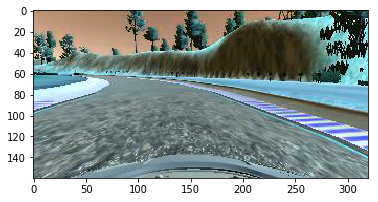

In [4]:
plt.figure()
plt.imshow(images[0])
plt.show()

In [5]:
X_train = np.array(images)
Y_train = np.array(measurements)

In [6]:
print(X_train.shape)
print(Y_train.shape)

(2835, 160, 320, 3)
(2835,)


In [14]:
# Keras Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Lambda, Convolution2D, MaxPooling2D

model = Sequential()
model.add(Lambda(lambda x:x/255.0-0.5, input_shape = (160,320,3)))
model.add(Convolution2D(6,5,5))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), border_mode = 'valid'))
model.add(Convolution2D(16,5,5))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2), border_mode = 'valid'))
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))



In [15]:
# Train the model
model.compile(loss = 'mse', optimizer= 'adam')
model.fit(X_train,Y_train,validation_split= 0.2, shuffle= True, nb_epoch= 3 )
model.save('model.h5')

Train on 2268 samples, validate on 567 samples
Epoch 1/3
 224/2268 [=>............................] - ETA: 159s - loss: 200.8185

KeyboardInterrupt: 